Implementing and Analyzing Neural Network using keras, pandas, sklearn (Image processing using UTKFace dataset)
----------------------------------------

Importing required libraries:

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import tensorboard
import os

Extracting UTKFace dataset:

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/UTKFace.tar.gz" .

In [ ]:
!tar xvzf UTKFace.tar.gz

Streaming output truncated to the last 5000 lines.
UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
UTKFace/26_1_1_20170116024053194.jpg.chip.jpg
UTKFace/25_1_0_20170109213232182.jpg.chip.jpg
UTKFace/28_1_1_20170112234526480.jpg.chip.jpg
UTKFace/57_0_0_20170117191704100.jpg.chip.jpg
UTKFace/27_1_1_20170117193211345.jpg.chip.jpg
UTKFace/46_1_1_20170116161237892.jpg.chip.jpg
UTKFace/24_0_2_20170116171647508.jpg.chip.jpg
UTKFace/42_1_1_20170113005712902.jpg.chip.jpg
UTKFace/25_1_1_20170116001337504.jpg.chip.jpg
UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
UTKFace/50_1_0_20170109012257664.jpg.chip.jpg
UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
UTKFace/7_0_0_20170110215711115.jpg.chip.jpg
UTKFace/1_1_2_20161219155353413.jpg.chip.jpg
UTKFace/26_0_1_20170117195651493.jpg.chip.jpg
UTKFace/7_0_0_20170110215648859.jpg.chip.jpg
UTKFace/64_0_0_20170117155540137.jpg.chip.jpg
UTKFace/48_0_0_20170109004813150.jpg.chip.jpg
UTKFace/39_0_0_20170103183230555.jpg.chip.jpg
UTKFace/45_0_1_20170117190019363

Phase 1)
------------
First, we label our data using each record's file name:

In [ ]:
img_path = list()
Races = list()
classes_labels = {}
raceClassInd = 0

path = "/content/UTKFace"

for img in os.listdir(path):
  temp = img.split('.')

  if len(temp[0].split('_')) == 4:
    img_path.append(os.path.join(path , img))
    Age , Gender , Race , Date = temp[0].split('_')
    if Race not in classes_labels.keys():
      classes_labels[Race] = raceClassInd
      raceClassInd += 1
    Races.append(int(Race))
  else:
    continue

Races = [str(keras.utils.to_categorical(cur_race , len(classes_labels))) for cur_race in Races]

df = pd.DataFrame({
    'image' : img_path,
    'Race': Races
})

<div dir=rtl><p> حال تعداد کلاس های موجود و تعداد داده‌های خوانده شده را چاپ می‌کنیم:  </p></div>
Then we print the number of different classes and pictures:

In [ ]:
print("Number of different classes : " + str(len(classes_labels)))
print("Number of all Data: " + str(len(img_path)))

Number of different classes : 5
Number of all Data: 23705


Now we print the resulting dataframe:

In [ ]:
df

,image,Race
0,/content/UTKFace/24_1_2_20170116165051346.jpg....,[0. 0. 1. 0. 0.]
1,/content/UTKFace/47_0_3_20170117190238883.jpg....,[0. 0. 0. 1. 0.]
2,/content/UTKFace/35_0_0_20170119201459165.jpg....,[1. 0. 0. 0. 0.]
3,/content/UTKFace/26_1_2_20170104022829221.jpg....,[0. 0. 1. 0. 0.]
4,/content/UTKFace/26_1_2_20170116184246209.jpg....,[0. 0. 1. 0. 0.]
...,...,...
23700,/content/UTKFace/8_1_0_20170109201110396.jpg.c...,[1. 0. 0. 0. 0.]
23701,/content/UTKFace/22_0_2_20170104015701971.jpg....,[0. 0. 1. 0. 0.]
23702,/content/UTKFace/36_0_1_20170116144540721.jpg....,[0. 1. 0. 0. 0.]
23703,/content/UTKFace/31_1_1_20170117164303317.jpg....,[0. 1. 0. 0. 0.]


The we plot the bar chart of our data:

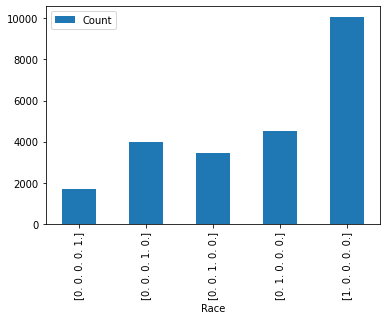

In [ ]:
race_count_df = df.groupby('Race').count()
race_count_df.columns = ['Count']
race_count_df.plot(kind = 'bar')

Also we plot one picture from each class:

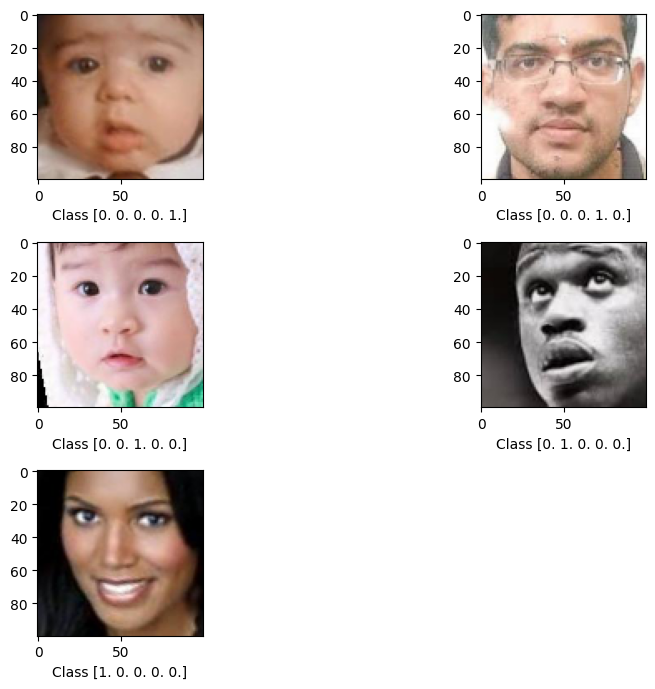

In [ ]:
selection_df = df.groupby('Race').sample(n = 1)
subplot_ind = 1

fig = plt.figure(num=None, figsize=(10, 7), dpi=100, facecolor='w', edgecolor='k')
for index , row in selection_df.iterrows():
  img_path = row['image']
  img_race = row['Race']
  img = keras.preprocessing.image.load_img(img_path , target_size = (100 , 100))
  plt.subplot(3 , 2 , subplot_ind)
  plt.xlabel('Class ' + img_race)
  plt.imshow(img)
  subplot_ind += 1

plt.tight_layout()
plt.show()

Now we multiply each pixel by $\frac{1}{255}$. Also, we resize each picture to $100 \times 100$ and convert to grayscale. Then, we put 80% of data into train set and the remaining 20% into test set.

In [ ]:
data_gen = ImageDataGenerator(
    rescale = 1 / 255.0,
    validation_split = 0.2  
)

train_gen = data_gen.flow_from_dataframe(
  df,
  x_col = 'image',
  y_col = 'Race',
  target_size = (100 , 100),
  class_mode = 'categorical',
  color_mode = 'grayscale',
  batch_size = 32,
  subset = 'training',
  shuffle = True
)

test_gen = data_gen.flow_from_dataframe(
  df,
  x_col = 'image',
  y_col = 'Race',
  target_size = (100 , 100),
  class_mode = 'categorical',
  color_mode = 'grayscale',
  batch_size = 32,
  subset = 'validation',
  shuffle = False
)

Found 18964 validated image filenames belonging to 5 classes.
Found 4741 validated image filenames belonging to 5 classes.


Phase 2)
----------
First, we create a neural network using keras:

In [ ]:
input = keras.Input(shape = (100 , 100 , 1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024 , activation = "relu")(output)
output = keras.layers.Dense(512 , activation = "relu")(output)
output = keras.layers.Dense(5 , activation = "softmax")(output)

model = keras.models.Model(inputs = input , outputs = output)
model.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.01) , metrics = ['accuracy'] , loss = 'categorical_crossentropy')

Now we want to calculate the number of parameters that should be trained. We should sum all weights and biases of all layers.

For example for the first layer the sum of all weight and bias parameters is $1024 \times (100 \times 100) + 1024 = 1024001024$

Total number of parameters is equal to 10,768,389.

In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              10241024  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________


Phase3)
--------------------

We train our network with the train set data:

In [ ]:
history = model.fit(train_gen , validation_data = test_gen , epochs = 10)

Epoch 1/10
593/593 [==============================] - 56s 93ms/step - loss: 0.7525 - accuracy: 0.7378 - val_loss: 0.7887 - val_accuracy: 0.7239
Epoch 2/10
593/593 [==============================] - 56s 94ms/step - loss: 0.7438 - accuracy: 0.7388 - val_loss: 0.7849 - val_accuracy: 0.7224
Epoch 3/10
593/593 [==============================] - 56s 94ms/step - loss: 0.7393 - accuracy: 0.7390 - val_loss: 0.7777 - val_accuracy: 0.7271
Epoch 4/10
593/593 [==============================] - 56s 94ms/step - loss: 0.7361 - accuracy: 0.7431 - val_loss: 0.7746 - val_accuracy: 0.7281
Epoch 5/10
593/593 [==============================] - 56s 94ms/step - loss: 0.7337 - accuracy: 0.7407 - val_loss: 0.7844 - val_accuracy: 0.7279
Epoch 6/10
593/593 [==============================] - 55s 93ms/step - loss: 0.7308 - accuracy: 0.7435 - val_loss: 0.7761 - val_accuracy: 0.7319
Epoch 7/10
593/593 [==============================] - 55s 93ms/step - loss: 0.7304 - accuracy: 0.7422 - val_loss: 0.7752 - val_accuracy:

Now we print precision, recall, and F1 score:

In [ ]:
y_pred = model.predict(test_gen) 
y_pred = y_pred.argmax(axis = -1)

y_true = test_gen.classes
print(classification_report(y_true , y_pred))

              precision    recall  f1-score   support

           0       0.42      0.08      0.14       344
           1       0.65      0.58      0.61       776
           2       0.81      0.65      0.72       699
           3       0.77      0.81      0.79       910
           4       0.72      0.88      0.79      2012

    accuracy                           0.73      4741
   macro avg       0.67      0.60      0.61      4741
weighted avg       0.71      0.73      0.70      4741



<div dir=rtl><p><b> قسمت اول:</b></p></div>

Our previous update formula (Gradient Descent):
<div><p> $\theta = \theta - \eta \cdot \overbrace {\nabla_\theta J(\theta; \, x, \, y)}^{\text{Backpropagation}}$ </p></div>

Now we add momentum to this formula:



<div><p> $\theta = \theta - \eta\nabla J(\theta) + \gamma v_{t}$ </p></div>

In this part we train our model with 0.5 and 0.9 momentum:

In [ ]:
model1 = keras.models.Model(inputs = input , outputs = output)
model1.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.01 , momentum=0.5) , metrics = ['accuracy'] , loss = 'categorical_crossentropy')

model2 = keras.models.Model(inputs = input , outputs = output)
model2.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.01 , momentum=0.9) , metrics = ['accuracy'] , loss = 'categorical_crossentropy')

momentum = 0.5:


In [ ]:
history = model1.fit(train_gen , validation_data = test_gen , epochs = 10)

Epoch 1/10
593/593 [==============================] - 61s 102ms/step - loss: 0.7346 - accuracy: 0.7412 - val_loss: 0.8051 - val_accuracy: 0.7228
Epoch 2/10
593/593 [==============================] - 60s 101ms/step - loss: 0.7321 - accuracy: 0.7406 - val_loss: 0.7874 - val_accuracy: 0.7224
Epoch 3/10
593/593 [==============================] - 61s 103ms/step - loss: 0.7303 - accuracy: 0.7438 - val_loss: 0.8025 - val_accuracy: 0.7224
Epoch 4/10
593/593 [==============================] - 60s 101ms/step - loss: 0.7275 - accuracy: 0.7448 - val_loss: 0.7709 - val_accuracy: 0.7283
Epoch 5/10
593/593 [==============================] - 60s 102ms/step - loss: 0.7248 - accuracy: 0.7444 - val_loss: 0.7885 - val_accuracy: 0.7254
Epoch 6/10
593/593 [==============================] - 60s 101ms/step - loss: 0.7243 - accuracy: 0.7429 - val_loss: 0.7896 - val_accuracy: 0.7252
Epoch 7/10
593/593 [==============================] - 61s 104ms/step - loss: 0.7201 - accuracy: 0.7476 - val_loss: 0.7994 - val_ac

momentum = 0.9:


In [ ]:
history = model2.fit(train_gen , validation_data = test_gen , epochs = 10)

Epoch 1/10
593/593 [==============================] - 41s 68ms/step - loss: 1.0396 - accuracy: 0.6203 - val_loss: 0.9581 - val_accuracy: 0.6505
Epoch 2/10
593/593 [==============================] - 41s 69ms/step - loss: 0.9974 - accuracy: 0.6396 - val_loss: 0.9711 - val_accuracy: 0.6298
Epoch 3/10
593/593 [==============================] - 41s 69ms/step - loss: 0.9981 - accuracy: 0.6329 - val_loss: 0.9542 - val_accuracy: 0.6528
Epoch 4/10
593/593 [==============================] - 41s 69ms/step - loss: 0.9718 - accuracy: 0.6471 - val_loss: 0.9264 - val_accuracy: 0.6621
Epoch 5/10
593/593 [==============================] - 41s 69ms/step - loss: 0.9210 - accuracy: 0.6732 - val_loss: 0.8297 - val_accuracy: 0.7096
Epoch 6/10
593/593 [==============================] - 41s 69ms/step - loss: 0.9056 - accuracy: 0.6780 - val_loss: 0.9050 - val_accuracy: 0.6543
Epoch 7/10
593/593 [==============================] - 41s 69ms/step - loss: 0.8790 - accuracy: 0.6894 - val_loss: 0.9028 - val_accuracy:

Now we train our model with Adam optimizer:

In [ ]:
model3 = keras.models.Model(inputs = input , outputs = output)
model3.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001) , metrics = ['accuracy'] , loss = 'categorical_crossentropy')

history = model3.fit(train_gen , validation_data = test_gen , epochs = 10)

Epoch 1/10
593/593 [==============================] - 66s 110ms/step - loss: 1.5166 - accuracy: 0.5204 - val_loss: 1.1203 - val_accuracy: 0.5735
Epoch 2/10
593/593 [==============================] - 66s 111ms/step - loss: 1.0382 - accuracy: 0.6250 - val_loss: 0.9327 - val_accuracy: 0.6680
Epoch 3/10
593/593 [==============================] - 66s 112ms/step - loss: 0.9526 - accuracy: 0.6594 - val_loss: 0.9672 - val_accuracy: 0.6454
Epoch 4/10
593/593 [==============================] - 65s 110ms/step - loss: 0.9270 - accuracy: 0.6683 - val_loss: 0.9897 - val_accuracy: 0.6343
Epoch 5/10
593/593 [==============================] - 66s 111ms/step - loss: 0.8914 - accuracy: 0.6868 - val_loss: 0.8538 - val_accuracy: 0.6927
Epoch 6/10
593/593 [==============================] - 66s 111ms/step - loss: 0.8835 - accuracy: 0.6865 - val_loss: 0.9445 - val_accuracy: 0.6577
Epoch 7/10
593/593 [==============================] - 66s 111ms/step - loss: 0.8487 - accuracy: 0.7031 - val_loss: 0.8477 - val_ac

In [ ]:
y3_pred = model3.predict(test_gen) 
y3_pred = y3_pred.argmax(axis = -1)

y3_true = test_gen.classes
print(classification_report(y3_true , y3_pred))

              precision    recall  f1-score   support

           0       0.41      0.15      0.21       344
           1       0.59      0.71      0.64       776
           2       0.76      0.74      0.75       699
           3       0.76      0.81      0.78       910
           4       0.80      0.81      0.80      2012

    accuracy                           0.73      4741
   macro avg       0.66      0.64      0.64      4741
weighted avg       0.72      0.73      0.72      4741



Now we would like to check how epoch affect our model:

epoch = 20:

In [ ]:
model4 = keras.models.Model(inputs = input , outputs = output)
model4.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001) , metrics = ['accuracy'] , loss = 'categorical_crossentropy')

history = model4.fit(train_gen , validation_data = test_gen , epochs = 20)

Epoch 1/20
593/593 [==============================] - 98s 164ms/step - loss: 0.6847 - accuracy: 0.7650 - val_loss: 0.8292 - val_accuracy: 0.7224
Epoch 2/20
593/593 [==============================] - 66s 111ms/step - loss: 0.6749 - accuracy: 0.7702 - val_loss: 0.7843 - val_accuracy: 0.7292
Epoch 3/20
593/593 [==============================] - 66s 111ms/step - loss: 0.6685 - accuracy: 0.7699 - val_loss: 0.8122 - val_accuracy: 0.7193
Epoch 4/20
593/593 [==============================] - 65s 110ms/step - loss: 0.6682 - accuracy: 0.7670 - val_loss: 0.7790 - val_accuracy: 0.7319
Epoch 5/20
593/593 [==============================] - 66s 111ms/step - loss: 0.6621 - accuracy: 0.7699 - val_loss: 0.8210 - val_accuracy: 0.7176
Epoch 6/20
593/593 [==============================] - 66s 112ms/step - loss: 0.6589 - accuracy: 0.7714 - val_loss: 0.8150 - val_accuracy: 0.7224
Epoch 7/20
593/593 [==============================] - 66s 112ms/step - loss: 0.6506 - accuracy: 0.7746 - val_loss: 0.7749 - val_ac

In [ ]:
y4_pred = model4.predict(test_gen) 
y4_pred = y4_pred.argmax(axis = -1)

y4_true = test_gen.classes
print(classification_report(y4_true , y4_pred))

              precision    recall  f1-score   support

           0       0.39      0.12      0.18       344
           1       0.57      0.73      0.64       776
           2       0.70      0.81      0.75       699
           3       0.71      0.82      0.76       910
           4       0.84      0.74      0.79      2012

    accuracy                           0.72      4741
   macro avg       0.64      0.64      0.62      4741
weighted avg       0.72      0.72      0.71      4741



Now we want to check loss function effect on our model:

First we train our model with MSE loss function:


In [ ]:
model5 = keras.models.Model(inputs = input , outputs = output)
model5.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001) , metrics = ['accuracy'] , loss = 'mean_squared_error')

history = model5.fit(train_gen , validation_data = test_gen , epochs = 20)

Epoch 1/20
593/593 [==============================] - 67s 112ms/step - loss: 0.0650 - accuracy: 0.7733 - val_loss: 0.0820 - val_accuracy: 0.7199
Epoch 2/20
593/593 [==============================] - 66s 112ms/step - loss: 0.0635 - accuracy: 0.7756 - val_loss: 0.0819 - val_accuracy: 0.7184
Epoch 3/20
593/593 [==============================] - 67s 112ms/step - loss: 0.0652 - accuracy: 0.7742 - val_loss: 0.0787 - val_accuracy: 0.7260
Epoch 4/20
593/593 [==============================] - 67s 113ms/step - loss: 0.0643 - accuracy: 0.7763 - val_loss: 0.0799 - val_accuracy: 0.7201
Epoch 5/20
593/593 [==============================] - 65s 110ms/step - loss: 0.0638 - accuracy: 0.7775 - val_loss: 0.0775 - val_accuracy: 0.7275
Epoch 6/20
593/593 [==============================] - 65s 110ms/step - loss: 0.0637 - accuracy: 0.7792 - val_loss: 0.0807 - val_accuracy: 0.7171
Epoch 7/20
593/593 [==============================] - 66s 111ms/step - loss: 0.0640 - accuracy: 0.7777 - val_loss: 0.0843 - val_ac

In [ ]:
y5_pred = model5.predict(test_gen) 
y5_pred = y5_pred.argmax(axis = -1)

y5_true = test_gen.classes
print(classification_report(y5_true , y5_pred))

              precision    recall  f1-score   support

           0       0.38      0.10      0.16       344
           1       0.57      0.73      0.64       776
           2       0.74      0.77      0.76       699
           3       0.80      0.78      0.79       910
           4       0.80      0.81      0.80      2012

    accuracy                           0.73      4741
   macro avg       0.66      0.64      0.63      4741
weighted avg       0.72      0.73      0.72      4741



Regularization effect on our model:

First we add one regularizer part to each layer:

In [ ]:
input = keras.Input(shape = (100 , 100 , 1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024 , activation = "relu" , kernel_regularizer = keras.regularizers.l2(l2 = 0.0001))(output)
output = keras.layers.Dense(512 , activation = "relu" , kernel_regularizer = keras.regularizers.l2(l2 = 0.0001))(output)
output = keras.layers.Dense(5 , activation = "softmax" , kernel_regularizer = keras.regularizers.l2(l2 = 0.0001))(output)

model6 = keras.models.Model(inputs = input , outputs = output)
model6.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001) , metrics = ['accuracy'] , loss = 'categorical_crossentropy')

In [ ]:
history = model6.fit(train_gen , validation_data = test_gen , epochs = 20)

Epoch 1/20
593/593 [==============================] - 93s 155ms/step - loss: 1.6150 - accuracy: 0.5275 - val_loss: 1.2421 - val_accuracy: 0.5887
Epoch 2/20
593/593 [==============================] - 93s 156ms/step - loss: 1.1214 - accuracy: 0.6281 - val_loss: 1.0362 - val_accuracy: 0.6655
Epoch 3/20
593/593 [==============================] - 93s 156ms/step - loss: 1.0544 - accuracy: 0.6474 - val_loss: 0.9818 - val_accuracy: 0.6705
Epoch 4/20
593/593 [==============================] - 93s 157ms/step - loss: 0.9915 - accuracy: 0.6642 - val_loss: 0.9539 - val_accuracy: 0.6830
Epoch 5/20
593/593 [==============================] - 93s 156ms/step - loss: 0.9526 - accuracy: 0.6762 - val_loss: 1.0910 - val_accuracy: 0.6528
Epoch 6/20
593/593 [==============================] - 92s 155ms/step - loss: 0.9324 - accuracy: 0.6821 - val_loss: 0.9276 - val_accuracy: 0.6859
Epoch 7/20
593/593 [==============================] - 92s 156ms/step - loss: 0.9097 - accuracy: 0.6887 - val_loss: 1.0097 - val_ac

In [ ]:
y6_pred = model6.predict(test_gen) 
y6_pred = y6_pred.argmax(axis = -1)

y6_true = test_gen.classes
print(classification_report(y6_true , y6_pred))

              precision    recall  f1-score   support

           0       0.36      0.03      0.06       329
           1       0.75      0.37      0.49       796
           2       0.68      0.78      0.73       694
           3       0.77      0.73      0.75       914
           4       0.68      0.90      0.77      2008

    accuracy                           0.70      4741
   macro avg       0.65      0.56      0.56      4741
weighted avg       0.69      0.70      0.67      4741



Now we add drop out layers to our model:

In [ ]:
input = keras.Input(shape = (100 , 100 , 1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024 , activation = "relu")(output)
output = keras.layers.Dropout(0.1)(output)
output = keras.layers.Dense(512 , activation = "relu")(output)
output = keras.layers.Dropout(0.1)(output)
output = keras.layers.Dense(5 , activation = "softmax")(output)

model7 = keras.models.Model(inputs = input , outputs = output)
model7.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001) , metrics = ['accuracy'] , loss = 'categorical_crossentropy')

In [ ]:
history = model7.fit(train_gen , validation_data = test_gen , epochs = 20)

Epoch 1/20
593/593 [==============================] - 67s 112ms/step - loss: 1.4654 - accuracy: 0.4877 - val_loss: 1.1121 - val_accuracy: 0.5619
Epoch 2/20
593/593 [==============================] - 66s 111ms/step - loss: 1.1045 - accuracy: 0.5840 - val_loss: 0.9978 - val_accuracy: 0.6317
Epoch 3/20
593/593 [==============================] - 66s 111ms/step - loss: 1.0534 - accuracy: 0.6082 - val_loss: 0.9542 - val_accuracy: 0.6617
Epoch 4/20
593/593 [==============================] - 69s 116ms/step - loss: 1.0262 - accuracy: 0.6149 - val_loss: 0.9277 - val_accuracy: 0.6920
Epoch 5/20
593/593 [==============================] - 69s 117ms/step - loss: 1.0087 - accuracy: 0.6283 - val_loss: 0.9317 - val_accuracy: 0.6764
Epoch 6/20
593/593 [==============================] - 70s 118ms/step - loss: 0.9997 - accuracy: 0.6286 - val_loss: 0.9144 - val_accuracy: 0.6783
Epoch 7/20
593/593 [==============================] - 70s 117ms/step - loss: 0.9715 - accuracy: 0.6455 - val_loss: 0.8870 - val_ac

In [ ]:
y7_pred = model7.predict(test_gen) 
y7_pred = y7_pred.argmax(axis = -1)

y7_true = test_gen.classes
print(classification_report(y7_true , y7_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       329
           1       0.56      0.72      0.63       796
           2       0.74      0.69      0.71       694
           3       0.67      0.81      0.73       914
           4       0.76      0.75      0.76      2008

    accuracy                           0.69      4741
   macro avg       0.55      0.59      0.57      4741
weighted avg       0.65      0.69      0.67      4741



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now we plot 10 pictures that we predict them correctly and also 10 pictures that we don't:

In [ ]:
y6_pred = model6.predict(test_gen)
y6_pred = y6_pred.argmax(axis = -1)

y6_true = test_gen.classes
y6_true_filenames = test_gen.filenames

In [ ]:
correct_index = []
wrong_index = []

for i , pred_class in enumerate(y6_pred):
  if pred_class == y6_true[i]:
    correct_index.append(i)
  else:
    wrong_index.append(i)

10 correct pictures:

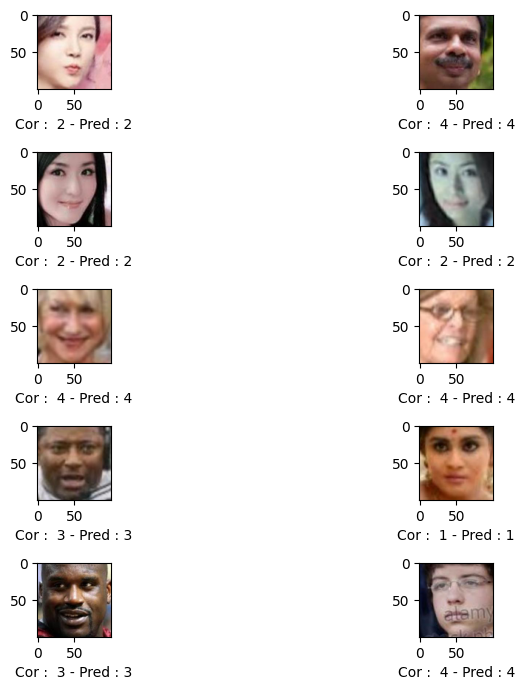

In [ ]:
fig = plt.figure(num=None, figsize=(10, 7), dpi=100, facecolor='w', edgecolor='k')

cnt = 0
subplot_ind = 1
for i in range(len(correct_index)):
  cur_ind = correct_index[i]

  img_path = y6_true_filenames[cur_ind]
  img_race = y6_true[cur_ind]
  img = keras.preprocessing.image.load_img(img_path , target_size = (100 , 100))
  plt.subplot(5 , 2 , subplot_ind)
  plt.xlabel('Cor :  ' + str(img_race) + ' - Pred : ' + str(y6_pred[cur_ind]))
  plt.imshow(img)
  subplot_ind += 1
  cnt += 1
  if cnt == 10:
    break
    
plt.tight_layout()
plt.show()   

10 wrong pictures:

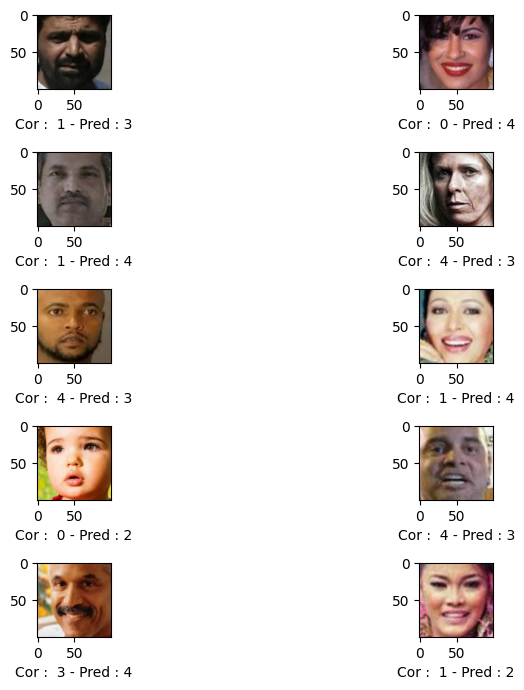

In [ ]:
fig = plt.figure(num=None, figsize=(10, 7), dpi=100, facecolor='w', edgecolor='k')

cnt = 0
subplot_ind = 1
for i in range(len(wrong_index)):
  cur_ind = wrong_index[i]

  img_path = y6_true_filenames[cur_ind]
  img_race = y6_true[cur_ind]
  img = keras.preprocessing.image.load_img(img_path , target_size = (100 , 100))
  plt.subplot(5 , 2 , subplot_ind)
  plt.xlabel('Cor :  ' + str(img_race) + ' - Pred : ' + str(y6_pred[cur_ind]))
  plt.imshow(img)
  subplot_ind += 1
  cnt += 1
  if cnt == 10:
    break
    
plt.tight_layout()
plt.show()